# RDS Homework 3 Template
## Spring 2022


In [1]:
!pip install shap

     |████████████████████████████████| 564 kB 14.2 MB/s 


In [2]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Problem 3

### Part (A)

In [3]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data and labels
newsgroups_train,y_train = fetch_20newsgroups(subset='train', categories=categories, return_X_y = True)
newsgroups_test, y_test = fetch_20newsgroups(subset='test', categories=categories, return_X_y = True)

# Set outcome class names
class_names = ['atheism', 'christian']

In [4]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train)
X_test = vectorizer.transform(newsgroups_test)

# Train & fit the classifier, using logistic loss to get a probability at the end 

classifier = SGDClassifier(loss = 'log')
classifier.fit(X_train, y_train)
y_hat = classifier.predict(X_test)

#print confusion matrix
sklearn.metrics.confusion_matrix(y_test, y_hat)

array([[276,  43],
       [  4, 394]])

### Part (B)

#### Explainer

In [5]:
# Initialize the explainer and apply to test data


#which indicies were correct and which were incorrect
import pandas as pd
preds_vs_true = pd.DataFrame([y_hat,y_test]).T
preds_vs_true.columns = ['pred','true']
correct_guesses = preds_vs_true.loc[preds_vs_true['pred'] == preds_vs_true['true']].index.tolist()
incorrect_guesses = preds_vs_true.loc[~(preds_vs_true['pred'] == preds_vs_true['true'])].index.tolist()



#set seed
import random

#select random documents to examine, first three are correct, last two are incorrect
random_docs = random.choices(correct_guesses, k = 3)
random_docs.extend(random.choices(incorrect_guesses, k = 2))


In [6]:
#deep dive into the document
idx = random_docs[0]
print("True label was Christian." if y_test[idx] else "True Label was Atheist.", '   Predicted label was Christian' if y_hat[idx] else "Predicted label was Atheist")
print(newsgroups_test[idx], sep='\n')

# We need to provide the data in dense format, not sparse
X_test_array = X_test.toarray() 

#Create SHAP explainer, by default, SGDClassifier defaults to a linear SVM
shap.initjs()

explainer = shap.LinearExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_test_array)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out()
)

True Label was Atheist. Predicted label was Atheist
From: bil@okcforum.osrhe.edu (Bill Conner)
Subject: Re: After 2000 years, can we say that Christian Morality is
Nntp-Posting-Host: okcforum.osrhe.edu
Organization: Okcforum Unix Users Group
X-Newsreader: TIN [version 1.1 PL9]
Lines: 30

Kent Sandvik (sandvik@newton.apple.com) wrote:
: In article <C5Mw03.9qr@darkside.osrhe.uoknor.edu>, bil@okcforum.osrhe.edu
: (Bill Conner) wrote:
: > I'd say that what one chooses to observe and how the observation is
: > interpreted and what significance it's given depends a great deal on
: > the values of the observer. Science is a human activity and as such,
: > is subject to the same potential for distortion as any other human
: > activity. The myth that scientists are above moral influence or
: > ethical concern, that their knowledge can be abstacted whole and pure
: > from nature untainted by the biases of the scientist, is nonsense.

: Bill, this is wonderfully phrased. I assume you understand t

In [7]:
#deep dive into the document
idx = random_docs[1]
print("True label was Christian." if y_test[idx] else "True Label was Atheist.", '   Predicted label was Christian' if y_hat[idx] else "Predicted label was Atheist")
print(newsgroups_test[idx], sep='\n')

# We need to provide the data in dense format, not sparse
X_test_array = X_test.toarray() 

#Create SHAP explainer, by default, SGDClassifier defaults to a linear SVM
shap.initjs()

explainer = shap.LinearExplainer(classifier, X_train)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out()
)

True Label was Atheist. Predicted label was Atheist
From: cmtan@iss.nus.sg (Tan Chade Meng - dan)
Subject: Re: Why?
Organization: Institute Of Systems Science, NUS
X-Newsreader: Tin 1.1 PL4
Lines: 20

boyd@acsu.buffalo.edu (Daniel F Boyd) writes:
: 
: If the Bible is such incredible proof of Christianity, then why aren't
: the Muslims or the Hindus convinced?
: 
: If the Qur'an is such incredible proof of Islam, then why aren't the
: Hindus or the Christians convinced?

If God exists, why aren't atheists convinced?

--

------------------+--------------------------------------------------------
                  |
Tan Chade Meng    |   "Yes, sir, I have only ONE question:
Singapore         | 
cmtan@iss.nus.sg  |    What is going on?!" 
                  |
------------------+--------------------------------------------------------




In [8]:
#deep dive into the document
idx = random_docs[2]
print("True label was Christian." if y_test[idx] else "True Label was Atheist.", '   Predicted label was Christian' if y_hat[idx] else "Predicted label was Atheist")
print(newsgroups_test[idx], sep='\n')

# We need to provide the data in dense format, not sparse
X_test_array = X_test.toarray() 

#Create SHAP explainer, by default, SGDClassifier defaults to a linear SVM
shap.initjs()

explainer = shap.LinearExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_test_array)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out()
)

True Label was Atheist. Predicted label was Atheist
From: kempmp@phoenix.oulu.fi (Petri Pihko)
Subject: Re: Consciousness part II - Kev Strikes Back!
Organization: University of Oulu, Finland
X-Newsreader: TIN [version 1.1 PL9]
Lines: 30

Scott D. Sauyet (SSAUYET@eagle.wesleyan.edu) wrote:
> In <1993Apr21.163848.8099@cs.nott.ac.uk> 
> Kevin Anthony (kax@cs.nott.ac.uk) writes:

> > Firstly, I'm not impressed with the ability of algorithms. They're
> > great at solving problems once the method has been worked out, but not
> > at working out the method itself.
>   [ .. crossword example deleted ... ]

> Have you heard of neural networks?  I've read a little about them, and
> they seems to overcome most of your objections.

I'm sure there are many people who work with neural networks and
read this newsgroup. Please tell Kevin what you've achieved, and
what you expect.

> I am not saying that NNs will solve all such problems, but I think
> they show that it is not as hard as you think to co

In [9]:
#deep dive into the document
idx = random_docs[3]
print("True label was Christian." if y_test[idx] else "True Label was Atheist.", '   Predicted label was Christian' if y_hat[idx] else "Predicted label was Atheist")
print(newsgroups_test[idx], sep='\n')

# We need to provide the data in dense format, not sparse
#Create SHAP explainer, by default, SGDClassifier defaults to a linear SVM
shap.initjs()

X_test_array = X_test.toarray() 

explainer = shap.LinearExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_test_array)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out()
)

True Label was Atheist.    Predicted label was Christian
From: sjs28257@uxa.cso.uiuc.edu (Steve Stelter)
Subject: Re: Mottos to replace "In doG we trust"
Organization: University of Illinois at Urbana
Lines: 12

pepke@dirac.scri.fsu.edu (Eric Pepke) writes:

>"In Mammon We Trust"
>"Hey, this is just a piece of paper!"
>"Spend Me Quickly"

"This is your god" (from John Carpenter's "They Live," natch)



                         --Steve "The Lurking Horror" Stelter
                           sjs28257@uxa.cso.uiuc.edu



In [10]:
#deep dive into the document
idx = random_docs[4]
print("True label was Christian." if y_test[idx] else "True Label was Atheist.", '   Predicted label was Christian' if y_hat[idx] else "Predicted label was Atheist")
print(newsgroups_test[idx], sep='\n')

# We need to provide the data in dense format, not sparse
X_test_array = X_test.toarray() 

#Create SHAP explainer, by default, SGDClassifier defaults to a linear SVM
shap.initjs()
explainer = shap.LinearExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_test_array)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out()
)

True Label was Atheist.    Predicted label was Christian
From: dekorte@dirac.scri.fsu.edu (Stephen L. DeKorte)
Subject: Re: Genocide is Caused by Theism : Evidence?
Organization: Supercomputer Computations Research Institute
Lines: 12


I saw a 3 hour show on PBS the other day about the history of the
Jews. Appearently, the Cursades(a religious war agianst the muslilams
in 'the holy land') sparked the widespread persecution of muslilams 
and jews in europe. Among the supporters of the persiecution, were none 
other than Martin Luther, and the Vatican.

Later, Hitler would use Luthers writings to justify his own treatment
of the jews.
> Genocide is Caused by Theism : Evidence?

SD



### Part (C)


#### Part (i)

In [11]:
# Compute the accuracy of the classifier and the number of misclassified documents
#accuracy
print('Accuracy of our classifier on test set data was ' + str(round(sklearn.metrics.accuracy_score(classifier.predict(X_test), y_test),4)))
#num misclassified
print('The number of misclassified documents was ' + str(len(incorrect_guesses)))

Accuracy of our classifier on test set data was 0.9344
The number of misclassified documents was 47


#### Part (ii)

Text(0.5, 1.0, 'Overall distribution of errors for misclassified documents')

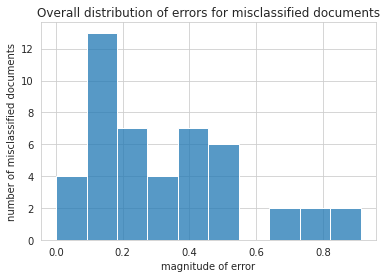

In [12]:
# Calculate conf_i for all misclassified documents 
incorrect_predictions_class_probabilities = classifier.predict_proba(X_test)[incorrect_guesses]

#simple histogram of error distribution
conf = abs(incorrect_predictions_class_probabilities[:,0]-incorrect_predictions_class_probabilities[:,1])

# Plot conf_i
sns.histplot(conf, bins = 10)
plt.xlabel('magnitude of error')
plt.ylabel('number of misclassified documents')
plt.title('Overall distribution of errors for misclassified documents')

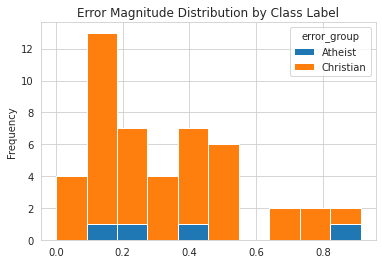

In [13]:
#plotting errors by class label
incorrect_predictions_class_probabilities = classifier.predict_proba(X_test)[incorrect_guesses]

prob_df = pd.DataFrame(incorrect_predictions_class_probabilities, columns = ['Atheist','Christian'])

def create_error_group(row):
  if row['Christian'] > row['Atheist']:
    return('Christian')
  else:
    return('Atheist')

def calc_error(row):
  if row['Christian'] > row['Atheist']:
    return(row['Christian']-row['Atheist'])
  else:
    return(row['Atheist']-row['Christian'])


prob_df['error_group'] =  prob_df.apply (lambda row: create_error_group(row), axis=1)
prob_df['error'] = prob_df.apply (lambda row: calc_error(row), axis=1)
prob_df['index'] = incorrect_guesses
prob_df.pivot(columns='error_group').error.plot.hist(stacked='True', title ='Error Magnitude Distribution by Class Label')



#### Part (iii)

In [14]:
import operator
from collections import defaultdict
def calc_word_misclassification_func(df, test_data, classifier=classifier, train_data=X_train):
  positive_results,  negative_results  = defaultdict(float), defaultdict(float)
  positive_counts, negative_counts = defaultdict(float), defaultdict(float)
  feats = vectorizer.get_feature_names_out()
  X_test_array = test_data.toarray() 
  explainer = shap.LinearExplainer(classifier, train_data) 
  shap_values = explainer.shap_values(X_test_array)
  for idx in df['index']:
    vals = shap_values[idx,:]
    for feat_i, val_i in zip(feats, vals):
        if val_i > 0:
          positive_results[feat_i] += val_i
          positive_counts[feat_i] +=1
        elif val_i < 0:
          negative_results[feat_i] += abs(val_i)
          negative_counts[feat_i] += 1
  if df['error_group'].unique()[0] == 'Christian':
    return(positive_results, positive_counts)
  else:
    return(negative_results, negative_counts)




In [15]:
christian_df = prob_df.loc[prob_df['error_group'] == 'Christian']
atheist_df = prob_df.loc[~(prob_df['error_group'] == 'Christian')]

christian_words, christian_counts = calc_word_misclassification_func(christian_df, test_data = X_test, classifier=classifier, train_data = X_train)
atheist_words, atheist_counts = calc_word_misclassification_func(atheist_df, test_data = X_test, classifier=classifier, train_data = X_train)

#create compiled dictionaries that aggregates misclassification weight by both classes, as well as count
final_weights = {k: christian_words.get(k, 0) + atheist_words.get(k, 0) for k in set(christian_words) | set(atheist_words)}
final_counts = {k: christian_counts.get(k, 0) + atheist_counts.get(k, 0) for k in set(christian_counts) | set(atheist_counts)}

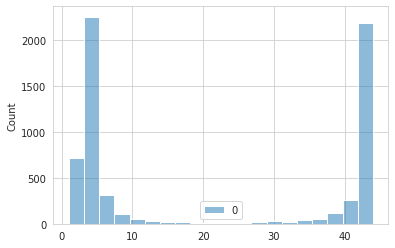

In [17]:
# Compute the number of documents (count_j) these words helped to misclassify
sns.histplot(final_counts.values(), bins = 20)


In [18]:
# Compute the sum of absolute SHAP values (weight_j) for each word_j

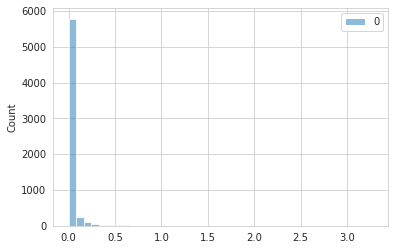

In [28]:
# Plot the distribution of count_j and weight_j
sns.histplot(final_weights.values(), bins = 40)


In [20]:
atheist_res = dict(sorted(atheist_counts.items(), key = operator.itemgetter(1), reverse = True)[:135])
christian_res = dict(sorted(christian_counts.items(), key = operator.itemgetter(1), reverse = True)[:160])

christian_res2 = list(sorted(christian_words.items(), key = operator.itemgetter(1), reverse = True))[:100]

overlap = set( christian_res.keys() ) & set( atheist_res.keys() )   
#christian_res2

In [21]:
#sorted(christian_words.items(),  key = operator.itemgetter(1), reverse = True)[:100]

stopwords2 = ['of', 'keith', 'the','it', 'to', 'umd','com','you','and','edu','caltech','is', 'we', 'host', 'nntp', 'mangoe','as','me','an', 'with',
'our', 'wingate','this','cobb', 'au', 'mantis','my', 'him', 'tek', 'so','org', 'am', 'their','frank', 'benedikt','or','may','his','sgi','who','uk',
'de','than','not','virginia','cco','kmr4']

### Part (D)

In [22]:
### look at which words misclassify the most, without contributing positively
correct_guesses = preds_vs_true.loc[preds_vs_true['pred'] == preds_vs_true['true']].index.tolist()

correct_predictions_class_probabilities = classifier.predict_proba(X_test)[correct_guesses]
valid_df  = pd.DataFrame(correct_predictions_class_probabilities, columns = ['Atheist','Christian'])


valid_df['error_group'] =  valid_df.apply (lambda row: create_error_group(row), axis=1)
valid_df['index'] = correct_guesses
valid_df

christian_right_df = valid_df.loc[valid_df['error_group'] == 'Christian']
atheist_right_df = valid_df.loc[valid_df['error_group'] == 'Atheist']

def calc_word_classification_func(df, test_data, classifier=classifier, train_data=X_train):
  positive_results,  negative_results  = defaultdict(float), defaultdict(float)
  positive_counts, negative_counts = defaultdict(float), defaultdict(float)
  feats = vectorizer.get_feature_names_out()
  X_test_array = test_data.toarray() 
  explainer = shap.LinearExplainer(classifier, train_data) 
  shap_values = explainer.shap_values(X_test_array)
  for idx in df['index']:
    vals = shap_values[idx,:]
    for feat_i, val_i in zip(feats, vals):
        if val_i > 0:
          positive_results[feat_i] += val_i
          positive_counts[feat_i] +=1
        elif val_i < 0:
          negative_results[feat_i] += abs(val_i)
          negative_counts[feat_i] += 1
  if df['error_group'].unique()[0] == 'Christian':
    return(positive_results, positive_counts)
  else:
    return(negative_results, negative_counts)


christian_words3, christian_counts3 = calc_word_classification_func(christian_right_df, classifier=classifier, train_data = X_train, test_data = X_test)
atheist_words3, atheist_counts3 = calc_word_classification_func(atheist_right_df, classifier=classifier, train_data = X_train, test_data = X_test)

#create compiled dictionaries that aggregates misclassification weight by both classes, as well as count
final_weights2 = {k: christian_words3.get(k, 0) + atheist_words3.get(k, 0) for k in set(christian_words3) | set(atheist_words3)}
final_counts2 = {k: christian_counts3.get(k, 0) + atheist_counts3.get(k, 0) for k in set(christian_counts3) | set(atheist_counts3)}

In [24]:
final_weights3 = {k: final_weights2.get(k, 0) - final_weights.get(k, 0) for k in set(final_weights2) | set(final_weights)}
final_weights2 = {k: christian_words3.get(k, 0) + atheist_words3.get(k, 0) for k in set(christian_words3) | set(atheist_words3)}


In [25]:
# Implement a strategy for feature selection
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:

def display_top_10_words_contributing_to_error(y_test, stopwords_list = None):

#load data, applying stopwords list
  newsgroups_train,y_train = fetch_20newsgroups(subset='train', categories=categories, return_X_y = True)
  newsgroups_test, y_test = fetch_20newsgroups(subset='test', categories=categories, return_X_y = True)
  vectorizer = TfidfVectorizer(stop_words=stopwords_list)
  print(vectorizer.get_stop_words())
  train = vectorizer.fit_transform(newsgroups_train)
  test = vectorizer.transform(newsgroups_test)

#fit classifier
  model = SGDClassifier(loss = 'log')
  model.fit(train, y_train)
  y_hat = model.predict(test)

  preds_vs_true = pd.DataFrame([y_hat,y_test]).T
  preds_vs_true.columns = ['pred','true']
  
  incorrect_guesses = preds_vs_true.loc[~(preds_vs_true['pred'] == preds_vs_true['true'])].index.tolist()
  incorrect_predictions_class_probabilities = model.predict_proba(test)[incorrect_guesses]
  correct_guesses = preds_vs_true.loc[preds_vs_true['pred'] == preds_vs_true['true']].index.tolist()

  correct_predictions_class_probabilities = classifier.predict_proba(X_test)[correct_guesses]


 
#create dataframe for incorrect predictions
  prob_df = pd.DataFrame(incorrect_predictions_class_probabilities, columns = ['Atheist','Christian'])
  prob_df['error_group'] =  prob_df.apply(lambda row: create_error_group(row), axis=1)
  prob_df['error'] = prob_df.apply(lambda row: calc_error(row), axis=1)
  prob_df['index'] = incorrect_guesses


#create dataframe for correct predictions
  valid_df  = pd.DataFrame(correct_predictions_class_probabilities, columns = ['Atheist','Christian'])
  valid_df['error_group'] =  valid_df.apply (lambda row: create_error_group(row), axis=1)
  valid_df['index'] = correct_guesses

#subset by wrong on atheist vs christian
  christian_df = prob_df.loc[prob_df['error_group'] == 'Christian']
  atheist_df = prob_df.loc[~(prob_df['error_group'] == 'Christian')]

  christian_words, christian_counts = calc_word_misclassification_func(christian_df,  test_data = test, classifier=model, train_data = train)
  atheist_words, atheist_counts = calc_word_misclassification_func(atheist_df, test_data = test, classifier=model, train_data = train)

#subset by correct on atheist vs christian

  christian_right_df = valid_df.loc[valid_df['error_group'] == 'Christian']
  atheist_right_df = valid_df.loc[valid_df['error_group'] == 'Atheist']

  #get christian and atheist words that contribute the most to error
  christian_words2, christian_counts2 = calc_word_classification_func(christian_right_df, classifier=classifier, train_data = X_train, test_data = X_test)
  atheist_words2, atheist_counts2 = calc_word_classification_func(atheist_right_df, classifier=classifier, train_data = X_train, test_data = X_test)

  #get christian and atheist words that contribute the most to positive predictions
  incorrect_temp = {k: christian_words.get(k, 0) + atheist_words.get(k, 0) for k in set(christian_words) | set(atheist_words)}
  correct_temp = {k: christian_words2.get(k, 0) + atheist_words2.get(k, 0) for k in set(christian_words2) | set(atheist_words2)}

  final_weights = {k: correct_temp.get(k,0)-incorrect_temp.get(k,0) for k in set(correct_temp)| set(incorrect_temp)}
  #calculate a per-word net informtion gain, with a negative value indicating the word contributes more to incorrectly classifying an example 
  #relative to it's ability in correctly classififying a bility 

  answer = sorted(final_weights.items(), key = operator.itemgetter(1), reverse = False)[0:10]
  return(answer,  sklearn.metrics.accuracy_score(model.predict(test), y_test), incorrect_guesses)


#christian_stopwords, atheist_stopwords = list(christian_res.keys()), list(atheist_res.keys())
#stopwords.extend(christian_stopwords)
#stopwords.extend(atheist_stopwords)
#stopwords.extend(stopwords2)


In [59]:
#using default stop words actually worsened performance!
results_dict2 = {}
#base performance at ~ 44-50 incorrectly classified
bad_words2 = []
bad_words_dict = {}
incorrect_guesses_dict = {}
for i in range(10):
  testwords, results_dict2[i], incorrect_guesses = display_top_10_words_contributing_to_error(y_test, bad_words2)
  #print(testwords[:9])
  temp2 = [x[0] for x in testwords]

  j = 0
  for k in range(len(testwords)):
      if i < 3 and j < 3:
        j+=1
      elif i >=3 and j < 2:
        j+=1
      elif testwords[k][1] < -2.5:
        j+=1
      else:
        break
  temp2 = temp2[:j]
  bad_words2 += temp2
  bad_words_dict[i] = bad_words2
  incorrect_guesses_dict[i] = incorrect_guesses
  print(results_dict2[i])
print(results_dict2)



frozenset()
0.9386331938633193
frozenset({'ncsu', 'oser', 'mayo'})
0.9372384937238494
frozenset({'oser', 'mayo', 'ncsu', 'thanx', 'oed', 'yoking'})
0.9330543933054394
frozenset({'oser', 'thanksgiving', 'mayo', 'odwyer', 'ncsu', 'ulysses', 'thanx', 'oed', 'yoking'})
0.9400278940027894
frozenset({'odious', 'oser', 'thanksgiving', 'mayo', 'odwyer', 'ncsu', 'ulysses', 'thanx', 'oed', 'yhvh', 'yoking'})
0.9470013947001394
frozenset({'odious', 'oser', 'thanksgiving', 'yevgeny', 'mayo', 'odwyer', 'ncsu', 'ulysses', 'ultimate', 'thanx', 'oed', 'yhvh', 'yoking'})
0.9330543933054394
frozenset({'odious', 'oser', 'odin', 'thanksgiving', 'yevgeny', 'mayo', 'odwyer', 'ncsu', 'ulysses', 'ultimate', 'thanx', 'oed', 'yhvh', 'yoking', 'tjl'})
0.9330543933054394
frozenset({'odious', 'oser', 'odin', 'odds', 'thanksgiving', 'yevgeny', 'mayo', 'odwyer', 'ncsu', 'ulysses', 'ultimate', 'thanx', 'oed', 'yhvh', 'thair', 'yoking', 'tjl'})
0.9442119944211994
frozenset({'oser', 'odin', 'ultimate', 'yep', 'odious',

In [74]:
bad_words_dict[4]

['oser',
 'mayo',
 'ncsu',
 'oed',
 'thanx',
 'yoking',
 'odwyer',
 'thanksgiving',
 'ulysses',
 'odious',
 'yhvh',
 'yevgeny',
 'ultimate',
 'odin',
 'tjl',
 'odds',
 'thair',
 'oddjob',
 'yep',
 'oddities',
 'th',
 'odder',
 'texts']

In [71]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection
print('feature selection helped classify the following entries:')
print(set(incorrect_guesses_dict[0]) - set(incorrect_guesses_dict[4]))

print('but caused inaccuracte predictions in:')

set(incorrect_guesses_dict[4]) - set(incorrect_guesses_dict[0])


feature selection helped classify the following entries:
{447, 107, 109, 607, 335, 469, 121, 703}
but caused in accuracte predictions in:


{547, 672}

In [81]:


idx = 703
print(y_test[idx], newsgroups_test[idx], sep='\n')
X_test_array = X_test.toarray() 
shap.initjs()
explainer = shap.LinearExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_test_array)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out())

0
From: aiken@unity.ncsu.edu (Wayne NMI Aiken)
Subject: Re: Mottos to replace "In doG we trust"
Organization: NCSU
X-Newsreader: TIN [version 1.1 PL8]
Lines: 18

Andrew Hilmer (hilmera@storm.cs.orst.edu) wrote:
: At the risk of beginning a cascade, I'll start with a possibly cheesy
: good 'ol Uhmericun:

: "Our shield is freedom"

Or, considering what our government has been doing for the past 50 years,
perhaps this would be more appropriate:

     "100% Debt"

--

Holy Temple of Mass  $   >>> slack@ncsu.edu <<<    $  "My used underwear
   Consumption!      $                             $   is legal tender in
PO Box 30904         $     BBS: (919) 782-3095     $   28 countries!"
Raleigh, NC  27622   $  Warning: I hoard pennies.  $     --"Bob"




In [77]:
idx = 685
print(y_test[idx], newsgroups_test[idx], sep='\n')
X_test_array = X_test.toarray() 

shap.initjs()

explainer = shap.LinearExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_test_array)
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names_out()
)

1
From: sandvik@newton.apple.com (Kent Sandvik)
Subject: Re: SOC.RELIGION.CHRISTIAN
Organization: Cookamunga Tourist Bureau
Lines: 23

In article <May.16.01.56.14.1993.6674@geneva.rutgers.edu>,
sfp@lemur.cit.cornell.edu (Sheila Patterson) wrote:
> As for the atheists/agnostics who read this list: if you aren't
> christian and if you have no intention of ever becoming one why on
> earth do you waste your time and mine by participating on a christian
> discussion list ?

I don't think we should draw borders around newsgroups, christians
are free to read and post entries on the atheist newsgroups, and 
muslims are free to so so in other groups as well.

It's up to each individual to define their time schedule concerning 
postings. The problems we all have noticed on various newsgroups
is the evangelistical method of telling that 'I am right, and you are
wrong'. This is true of both theists and atheists.

Hopefully a more constructive dialogue between the groups 
would help concerning assu